In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Equation Thermique de la résistance

## Equation de la Température 
$$C \, d\dfrac{T(t)}{dt} = P_{app}(t) - P_{pertes}$$
$$P_{pertes} = h.A.(T(t) - T_{amb})$$
$$\Longrightarrow C \, d\dfrac{T(t)}{dt} = P_{app}(t) - h.A.(T(t) - T_{amb})$$

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes du problème
C = 1000  # Capacité thermique en J/K
h = 10    # Coefficient de convection en W/m²K
A = 0.1   # Surface d'échange thermique en m²
Tamb = 20 # Température ambiante en °C
T_cible = 50  # Température cible pour le contrôle

# Gain proportionnel pour l'asservissement de la puissance
Kp = 5.0  # Coefficient de proportionnalité pour la puissance

Ki = 0.1  # Gain intégral (à ajuster)
integral_error = 0  # Initialisation de l'intégrale de l'erreur



# Méthode d'Euler pour résoudre l'équation couplée T et Papp
def euler_method(T0, Papp0, t_final, dt):
    t_values = np.arange(0, t_final, dt)  # Temps discrétisé
    T_values = np.zeros_like(t_values)    # Températures discrétisées
    Papp_values = np.zeros_like(t_values) # Puissance appliquée discrétisée
    
    T_values[0] = T0                     # Température initiale
    Papp_values[0] = Papp0               # Puissance appliquée initiale
    
    # Boucle sur les points de temps pour appliquer Euler
    for n in range(1, len(t_values)):
        t = t_values[n-1]
        T = T_values[n-1]
        Papp = Papp_values[n-1]
        error = T_cible - T
        integral_error += error * dt  # Calcul de l'intégrale de l'erreur
        
        # Mise à jour de la puissance appliquée selon l'asservissement
        #Papp_values[n] = Kp * (T_cible - T)
        Papp_values[n] = Kp * error + Ki * integral_error

        # Application de l'équation d'évolution discrétisée pour T
        T_values[n] = T + dt * (Papp - h * A * (T - Tamb)) / C
    
    return t_values, T_values, Papp_values

# Paramètres de simulation
T0 = 25      # Température initiale en °C
Papp0 = 100  # Puissance initiale en W
t_final = 1500 # Temps final de la simulation en secondes
dt = 0.1      # Pas de temps en secondes

# Résolution de l'équation
t_values, T_values, Papp_values = euler_method(T0, Papp0, t_final, dt)

# Affichage des résultats
plt.figure(figsize=(10, 5))

# Graphique pour la température
plt.subplot(1, 2, 1)
plt.plot(t_values, T_values, label="Température de la résistance")
plt.axhline(Tamb, color='r', linestyle='--', label="Température ambiante")
plt.axhline(T_cible, color='g', linestyle='--', label="Température cible")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.title("Évolution de la température")

# Graphique pour la puissance appliquée
plt.subplot(1, 2, 2)
plt.plot(t_values, Papp_values, label="Puissance appliquée")
plt.xlabel("Temps (s)")
plt.ylabel("Puissance (W)")
plt.legend()
plt.grid(True)
plt.title("Évolution de la puissance appliquée")

plt.tight_layout()
plt.show()


UnboundLocalError: local variable 'integral_error' referenced before assignment

## Calcul de R(t)

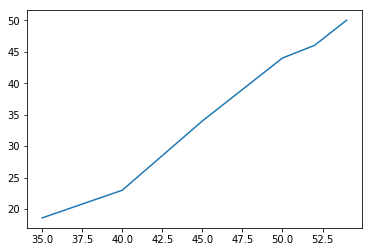

In [10]:
T_i = [35,40,45,50,51,52,54]
R_i = [18.6,23,34,44,45,46,50]
if len(T_i) == len(R_i):
    plt.plot(T_i, R_i)


On applique une regression linéaire pour avoir la résistance en fonction de la température

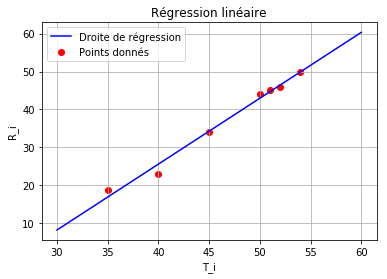

In [11]:



T_i = np.array(T_i).reshape(-1, 1)
R_i = np.array(R_i)

model = LinearRegression()
model.fit(T_i, R_i)

T_range = np.linspace(30, 60, 100).reshape(-1, 1)
R_pred = model.predict(T_range)


plt.scatter(T_i, R_i, color='red', label='Points donnés')
plt.plot(T_range, R_pred, color='blue', label='Droite de régression')


plt.title('Régression linéaire')
plt.xlabel('T_i')
plt.ylabel('R_i')
plt.legend()


plt.grid(True)
plt.show()

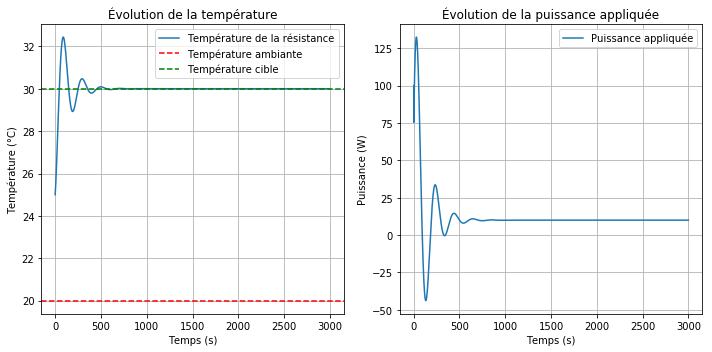

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes du problème
C = 1000  # Capacité thermique en J/K
h = 10    # Coefficient de convection en W/m²K
A = 0.1   # Surface d'échange thermique en m²
Tamb = 20 # Température ambiante en °C
T_cible = 30  # Température cible pour le contrôle

# Gains PID pour l'asservissement de la puissance
Kp = 15.0  # Gain proportionnel
Ki = 1.0  # Gain intégral (à ajuster)
Kd = 0.1   # Gain dérivé pour amortir la réponse
integral_error = 0  # Initialisation de l'intégrale de l'erreur
previous_error = 0

# Méthode d'Euler pour résoudre l'équation couplée T et Papp
def euler_method(T0, Papp0, t_final, dt):
    global integral_error
    t_values = np.arange(0, t_final, dt)  # Temps discrétisé
    T_values = np.zeros_like(t_values)    # Températures discrétisées
    Papp_values = np.zeros_like(t_values) # Puissance appliquée discrétisée
    
    T_values[0] = T0                     # Température initiale
    Papp_values[0] = Papp0               # Puissance appliquée initiale
    
    # Boucle sur les points de temps pour appliquer Euler
    for n in range(1, len(t_values)):
        t = t_values[n-1]
        T = T_values[n-1]
        
        # Calcul de l'erreur et mise à jour de l'intégrale de l'erreur
        error = T_cible - T
        integral_error += error * dt  # Calcul de l'intégrale de l'erreur
        
        # Mise à jour de la puissance appliquée avec contrôle PI
        Papp_values[n] = Kp * error + Ki * integral_error
        
        # Application de l'équation d'évolution discrétisée pour T
        T_values[n] = T + dt * (Papp_values[n] - h * A * (T - Tamb)) / C
    
    return t_values, T_values, Papp_values

# Paramètres de simulation
T0 = 25      # Température initiale en °C
Papp0 = 100  # Puissance initiale en W
t_final = 3000 # Temps final de la simulation en secondes
dt = 0.1      # Pas de temps en secondes

# Résolution de l'équation
t_values, T_values, Papp_values = euler_method(T0, Papp0, t_final, dt)

# Affichage des résultats
plt.figure(figsize=(10, 5))

# Graphique pour la température
plt.subplot(1, 2, 1)
plt.plot(t_values, T_values, label="Température de la résistance")
plt.axhline(Tamb, color='r', linestyle='--', label="Température ambiante")
plt.axhline(T_cible, color='g', linestyle='--', label="Température cible")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.title("Évolution de la température")

# Graphique pour la puissance appliquée
plt.subplot(1, 2, 2)
plt.plot(t_values, Papp_values, label="Puissance appliquée")
plt.xlabel("Temps (s)")
plt.ylabel("Puissance (W)")
plt.legend()
plt.grid(True)
plt.title("Évolution de la puissance appliquée")

plt.tight_layout()
plt.show()


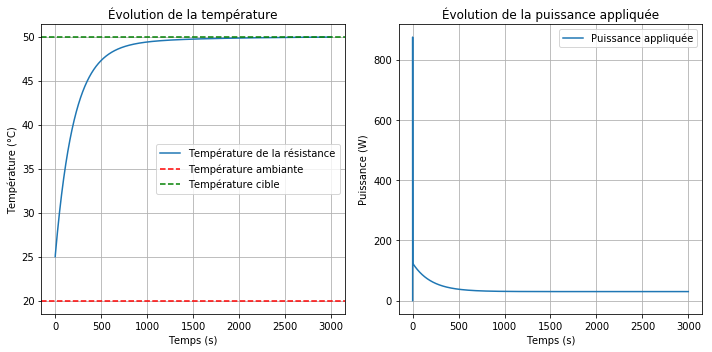

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes du problème
C = 1000  # Capacité thermique en J/K
h = 10    # Coefficient de convection en W/m²K
A = 0.1   # Surface d'échange thermique en m²
Tamb = 20 # Température ambiante en °C
T_cible = 50  # Température cible pour le contrôle

# Gains PID pour l'asservissement de la puissance
Kp = 5.0  # Gain proportionnel
Ki = 0.005# Gain intégral
Kd = 3.0   # Gain dérivé pour amortir la réponse

# Initialisation de l'intégrale et de la dérivée de l'erreur
integral_error = 0
previous_error = 0

# Méthode d'Euler pour résoudre l'équation couplée T et Papp
def euler_method(T0, Papp0, t_final, dt):
    global integral_error, previous_error
    t_values = np.arange(0, t_final, dt)  # Temps discrétisé
    T_values = np.zeros_like(t_values)    # Températures discrétisées
    Papp_values = np.zeros_like(t_values) # Puissance appliquée discrétisée
    
    T_values[0] = T0                     # Température initiale
    Papp_values[0] = Papp0               # Puissance appliquée initiale
    
    # Boucle sur les points de temps pour appliquer Euler
    for n in range(1, len(t_values)):
        T = T_values[n-1]
        
        # Calcul de l'erreur et mise à jour de l'intégrale et de la dérivée de l'erreur
        error = T_cible - T
        integral_error += error * dt  # Calcul de l'intégrale de l'erreur
        derivative_error = (error - previous_error) / dt  # Calcul de la dérivée de l'erreur
        previous_error = error  # Mise à jour de l'erreur précédente
        
        # Mise à jour de la puissance appliquée avec contrôle PID
        Papp_values[n] = Kp * error + Ki * integral_error + Kd * derivative_error
        
        # Application de l'équation d'évolution discrétisée pour T
        T_values[n] = T + dt * (Papp_values[n] - h * A * (T - Tamb)) / C
    
    return t_values, T_values, Papp_values

# Paramètres de simulation
T0 = 25      # Température initiale en °C
Papp0 = 0  # Puissance initiale en W
t_final = 3000 # Temps final de la simulation en secondes
dt = 0.1      # Pas de temps en secondes

# Résolution de l'équation
t_values, T_values, Papp_values = euler_method(T0, Papp0, t_final, dt)

# Affichage des résultats
plt.figure(figsize=(10, 5))

# Graphique pour la température
plt.subplot(1, 2, 1)
plt.plot(t_values, T_values, label="Température de la résistance")
plt.axhline(Tamb, color='r', linestyle='--', label="Température ambiante")
plt.axhline(T_cible, color='g', linestyle='--', label="Température cible")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.title("Évolution de la température")

# Graphique pour la puissance appliquée
plt.subplot(1, 2, 2)
plt.plot(t_values, Papp_values, label="Puissance appliquée")
plt.xlabel("Temps (s)")
plt.ylabel("Puissance (W)")
plt.legend()
plt.grid(True)
plt.title("Évolution de la puissance appliquée")

plt.tight_layout()
plt.show()
